In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.morphology import label
from skimage.data import imread

import os
import time
import sys


In [ ]:

TRAINING_VALIDATION_RATIO = 0.2
WORKING_DIR = '/kaggle/working'
INPUT_DIR = '/kaggle/input'
OUTPUT_DIR = '/kaggle/output'
LOGS_DIR = os.path.join(WORKING_DIR, "logs")
TRAIN_DATA_PATH = os.path.join(INPUT_DIR, 'airbus-ship-detection/train_v2')
TEST_DATA_PATH = os.path.join(INPUT_DIR, 'airbus-ship-detection/test_v2')
SAMPLE_SUBMISSION_PATH = os.path.join(INPUT_DIR, 'airbus-ship-detection/sample_submission_v2.csv')
TRAIN_SHIP_SEGMENTATIONS_PATH = os.path.join(INPUT_DIR, 'airbus-ship-detection/train_ship_segmentations_v2.csv')
MASK_RCNN_PATH = os.path.join(WORKING_DIR, 'Mask_RCNN-master')
COCO_WEIGHTS_PATH = os.path.join(WORKING_DIR, "mask_rcnn_coco.h5")
SHIP_CLASS_NAME = 'ship'
IMAGE_WIDTH = 768
IMAGE_HEIGHT = 768
SHAPE = (IMAGE_WIDTH, IMAGE_HEIGHT)

test_ds = os.listdir(TEST_DATA_PATH)
train_ds = os.listdir(TRAIN_DATA_PATH)

print('Working Dir:', WORKING_DIR, os.listdir(WORKING_DIR))
print('Input Dir:', INPUT_DIR, os.listdir(INPUT_DIR))
print('train dataset from: {}, {}'.format(TRAIN_DATA_PATH, len(train_ds)))
print('test dataset from: {}, {}'.format(TRAIN_DATA_PATH, len(test_ds)))
print(TRAIN_SHIP_SEGMENTATIONS_PATH)

In [8]:
#Moraite
pip install opencv-python

SyntaxError: invalid syntax (<ipython-input-8-c46a14fddf24>, line 2)

In [27]:
import cv2
import os
import matplotlib.pyplot as plt

In [70]:
from PIL import Image
import numpy as np
import json

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [32]:
for image in load_images_from_folder("/Users/fpriscoll/Desktop/DS_4002/ship_classification/ship"):
        array = image
        Image.fromarray(image, 'RGB')
        
        #input_data = np.array(image, 3).astype('uint8')
        #img.show()  
        
        

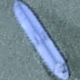

In [45]:
img

In [33]:
len(array)

80

In [72]:
n_spectrum = 3 # the number of color chanels: RGB 
weight = 80
height = 80
X = array.reshape([-1, n_spectrum, weight, height])
X[0].shape
 


(3, 80, 80)

In [60]:
# let`s pick one channel 
pic = X[0]
red_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectrum = pic[2]

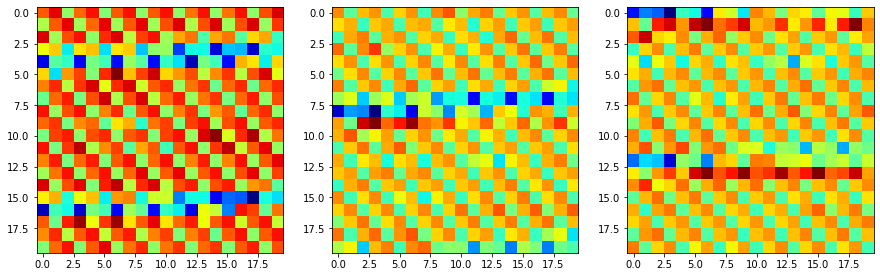

In [61]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')
#show each channel
plt.subplot(1, 3, 1)
plt.imshow(red_spectrum)
plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)
plt.subplot(1, 3, 3)
plt.imshow(blue_spectrum)
plt.show()

In [11]:
load_images_from_folder("/Users/fpriscoll/Desktop/DS_4002/ship_classification/ship")

[array([[[104, 123, 128],
         [111, 130, 135],
         [105, 124, 126],
         ...,
         [121, 143, 146],
         [119, 140, 144],
         [113, 133, 136]],
 
        [[119, 137, 143],
         [119, 138, 144],
         [111, 131, 134],
         ...,
         [125, 146, 150],
         [127, 149, 154],
         [119, 138, 142]],
 
        [[119, 138, 143],
         [121, 141, 146],
         [118, 139, 143],
         ...,
         [116, 137, 138],
         [116, 136, 138],
         [115, 133, 136]],
 
        ...,
 
        [[128, 150, 154],
         [130, 151, 155],
         [128, 148, 151],
         ...,
         [ 90, 109, 109],
         [ 83, 103, 103],
         [ 80,  98,  99]],
 
        [[126, 148, 152],
         [122, 144, 149],
         [121, 142, 146],
         ...,
         [107, 128, 130],
         [ 85, 107, 107],
         [ 87, 108, 110]],
 
        [[118, 140, 143],
         [113, 135, 137],
         [111, 133, 136],
         ...,
         [122, 143, 148],
  

In [74]:
f = open("/Users/fpriscoll/Desktop/DS_4002/ship_classification/rhammel_ship_data/shipsnet.json")
dataset = json.load(f)
f.close()
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')
input_data.shape
(4000, 19200)

'''
# and since I was currios to see how the tupple of arrays of arrays look like:
input_data
array([[ 82,  89,  91, ...,  86,  88,  89],
     [ 76,  75,  67, ...,  54,  57,  58],
     [125, 127, 129, ..., 111, 109, 115],
     ...,
     [171, 135, 118, ...,  95,  95,  85],
     [ 85,  90,  94, ...,  96,  95,  89],
     [122, 122, 126, ...,  51,  46,  69]], dtype=uint8)
  # now we realize that this is not a photo format that we can visualize, in order to be able to read an image we need to reshape the array/input_data:
'''

n_spectrum = 3 # the number of color chanels: RGB 
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape
 
  # let`s pick one channel 
pic = X[3]
red_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectrum = pic[2]

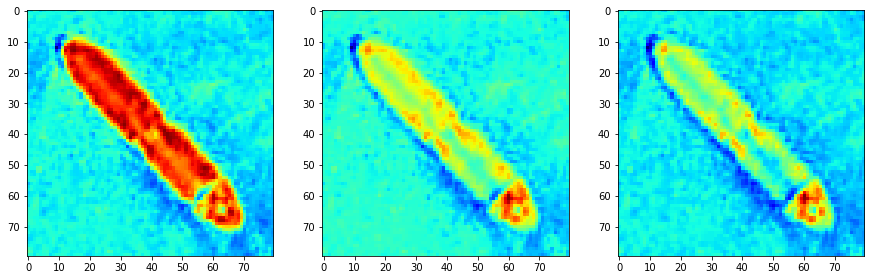

In [75]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')
#show each channel
plt.subplot(1, 3, 1)
plt.imshow(red_spectrum)
plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)
plt.subplot(1, 3, 3)
plt.imshow(blue_spectrum)
plt.show()

In [81]:
#Importing packages
import np_utils
import keras

In [98]:
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD



In [94]:
from tensorflow.keras.layers import Dropout

In [83]:
y = np_utils.to_categorical(output_data, 2)

In [84]:
indexes = np.arange(4000)
np.random.shuffle(indexes)

In [85]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [86]:
X_train = X_train / 255 
# images are type uint8 with values in the [0, 255] interval and we would like to contain values between 0 and 1
    
    
    

In [ ]:
#SECOND PART TRAINING THE MODEL / NEURAL NETWORK

In [99]:
np.random.seed(42)
  # network design
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))
model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [103]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
  loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])
# training
model.fit(
  X_train, 
  y_train,
  batch_size=32, # 32 photos at once
  epochs=18,
  validation_split=0.2,
  shuffle=True,
  verbose=2)

/Users/fpriscoll/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/18
100/100 - 20s - loss: 0.3894 - accuracy: 0.8344 - val_loss: 0.2601 - val_accuracy: 0.9075 - 20s/epoch - 204ms/step
Epoch 2/18
100/100 - 16s - loss: 0.2143 - accuracy: 0.9062 - val_loss: 0.1616 - val_accuracy: 0.9463 - 16s/epoch - 161ms/step
Epoch 3/18
100/100 - 14s - loss: 0.1798 - accuracy: 0.9281 - val_loss: 0.1551 - val_accuracy: 0.9488 - 14s/epoch - 145ms/step
Epoch 4/18
100/100 - 14s - loss: 0.1414 - accuracy: 0.9406 - val_loss: 0.1288 - val_accuracy: 0.9475 - 14s/epoch - 145ms/step
Epoch 5/18
100/100 - 15s - loss: 0.1267 - accuracy: 0.9522 - val_loss: 0.1381 - val_accuracy: 0.9500 - 15s/epoch - 146ms/step
Epoch 6/18
100/100 - 14s - loss: 0.1156 - accuracy: 0.9572 - val_loss: 0.1017 - val_accuracy: 0.9712 - 14s/epoch - 143ms/step
Epoch 7/18
100/100 - 14s - loss: 0.1102 - accuracy: 0.9575 - val_loss: 0.0765 - val_accuracy: 0.9762 - 14s/epoch - 136ms/step
Epoch 8/18
100/100 - 14s - loss: 0.0912 - accuracy: 0.9675 - val_loss: 0.0958 - val_accuracy: 0.9775 - 14s/epoch - 141

In [102]:
#THIRD PART APPLY THE MODEL AND SEARCH ON THE IMAGE

In [125]:
image_sf1 = Image.open('/Users/fpriscoll/Desktop/DS_4002/ship_classification/rhammel_ship_data/scenes/scenes/sfbay_1.png')
image_sf2 = Image.open('/Users/fpriscoll/Desktop/DS_4002/ship_classification/rhammel_ship_data/scenes/scenes/sfbay_2.png')
image_lb1 = Image.open('/Users/fpriscoll/Desktop/DS_4002/ship_classification/rhammel_ship_data/scenes/scenes/lb_1.png')
image_lb2 = Image.open('/Users/fpriscoll/Desktop/DS_4002/ship_classification/rhammel_ship_data/scenes/scenes/lb_2.png')

pix_sf1 = image_sf1.load()
pix_sf2 = image_sf2.load()
pix_lb1 = image_lb1.load()
pix_lb2 = image_lb2.load()




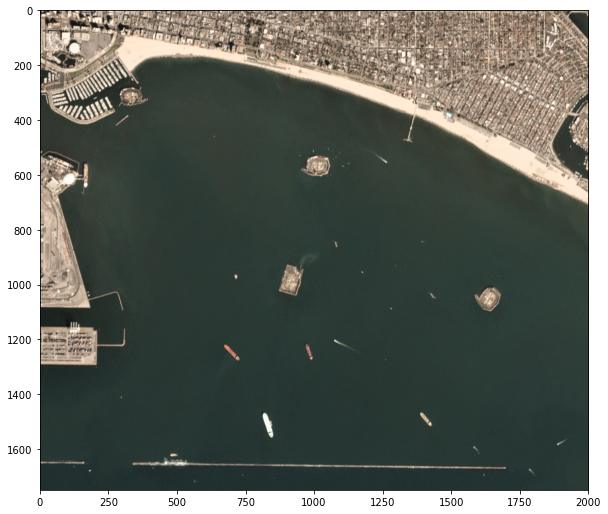

In [139]:
n_spectrum = 3
width = image_lb1.size[0]
height = image_lb1.size[1]
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix_lb1[x, y][chanel])
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)
plt.figure(1, figsize = (15, 30))
plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)
plt.show()



In [140]:
#Now lets search for ships on the image

In [141]:
picture_tensor = picture_tensor.transpose(2,0,1)
# Search on the image
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study


def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

In [142]:
import sys


X:1310 Y:410  [[0.05169422 0.94830585]]


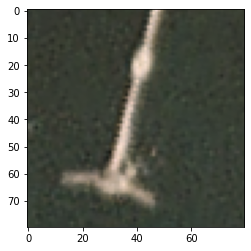

X:30 Y:680  [[0.09754901 0.90245104]]


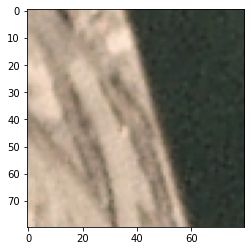

X:120 Y:970   [[0.07861405 0.92138594]]


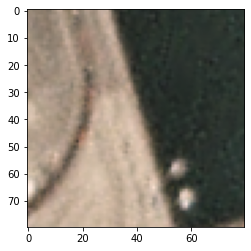

X:250 Y:1010  [[0.03656572 0.9634343 ]]


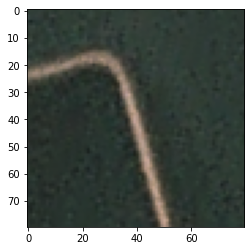

X:190 Y:1180  [[0.01212288 0.98787713]]


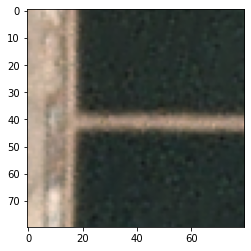

X:650 Y:1200  [[1.1444198e-06 9.9999881e-01]]


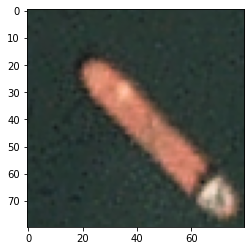

X:940 Y:1200  [[0.00434541 0.9956546 ]]


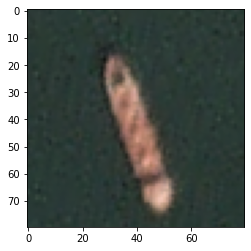

X:1360 Y:1440  [[0.00804878 0.9919512 ]]


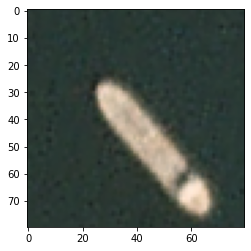

X:780 Y:1460   [[0.09399682 0.9060032 ]]


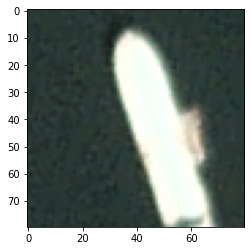

X:70 Y:1610  [[0.09353254 0.9064675 ]]


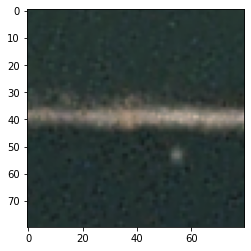

X:320 Y:1610  [[0.00354784 0.9964522 ]]


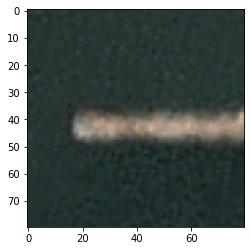

X:410 Y:1610  [[0.09233058 0.9076694 ]]


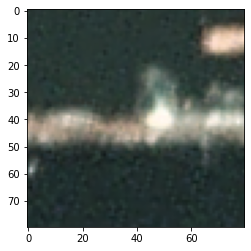

X:500 Y:1610  [[0.00961943 0.99038064]]


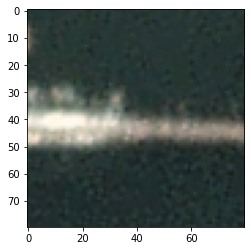

X:820 Y:1620  [[0.08127199 0.91872805]]


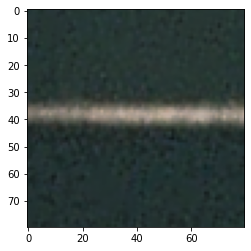

X:910 Y:1620  [[0.01391502 0.98608494]]


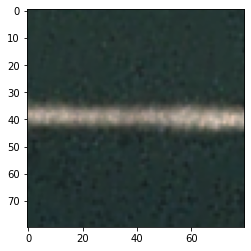

X:1000 Y:1620  [[0.00214386 0.9978561 ]]


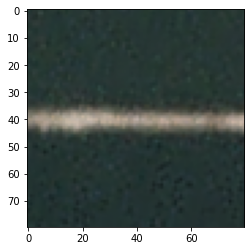

X:1090 Y:1620  [[0.00415575 0.9958443 ]]


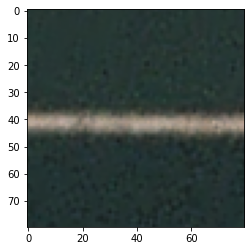

X:1180 Y:1620  [[0.00157133 0.99842864]]


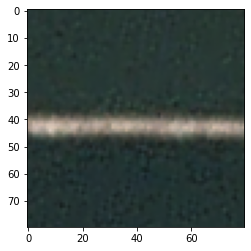

X:1270 Y:1620  [[9.9605997e-04 9.9900395e-01]]


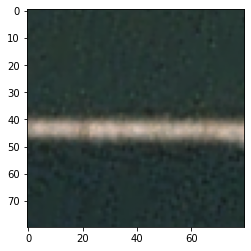

X:1360 Y:1620  [[0.00450435 0.9954957 ]]


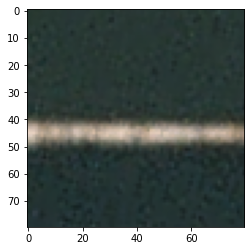

X:1480 Y:1630  [[0.09606285 0.90393716]]


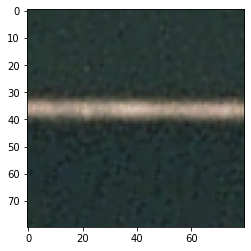

X:1570 Y:1630  [[0.09541861 0.90458137]]


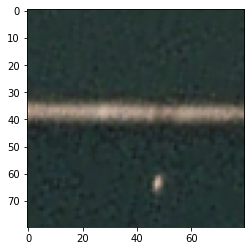

X:1920 Y:1660  

In [143]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()
            
            

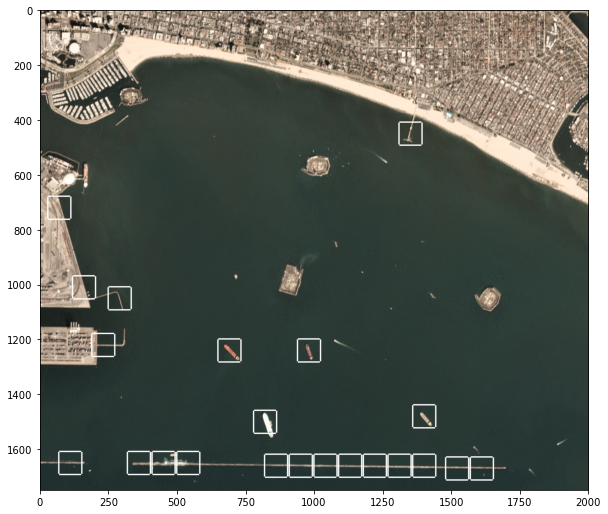

In [144]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape
(1777, 2825, 3)

plt.figure(1, figsize = (15, 30))
plt.subplot(3,1,1)
plt.imshow(picture_tensor)
plt.show()